<span style="font-size:30px"><b>Import Required Libraries</b></span>


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='whitegrid')
%matplotlib inline

<span style="font-size:30px"><b>Load the Dataset</b></span>


In [16]:
df = pd.read_csv('zomato.csv', encoding='latin-1')
df.head()

,Restaurant Name,City,Cuisines,Average Cost for two,Aggregate rating,Has Online delivery
0,Spice Hub,Delhi,"North Indian, Mughlai",500,4.2,Yes
1,Tandoori Treats,Mumbai,"Tandoori, Indian",700,3.8,Yes
2,Veggie Delight,Chennai,"South Indian, Vegan",300,4.5,No
3,Biryani House,Bangalore,Biryani,600,4.1,Yes
4,Pizza Palace,Hyderabad,"Italian, Pizza",900,4.0,No


<span style="font-size:30px"><b>Shape and info</b></span>


In [26]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       200 non-null    object 
 1   City                  200 non-null    object 
 2   Cuisines              200 non-null    object 
 3   Average Cost for two  200 non-null    int64  
 4   Aggregate rating      200 non-null    float64
 5   Has Online delivery   200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


((200, 6), None)

<span style="font-size:30px"><b>Check for missing values</b></span>


In [29]:
df.isnull().sum()

Restaurant Name         0
City                    0
Cuisines                0
Average Cost for two    0
Aggregate rating        0
Has Online delivery     0
dtype: int64

<span style="font-size:30px"><b>Plot Histogram</b></span>


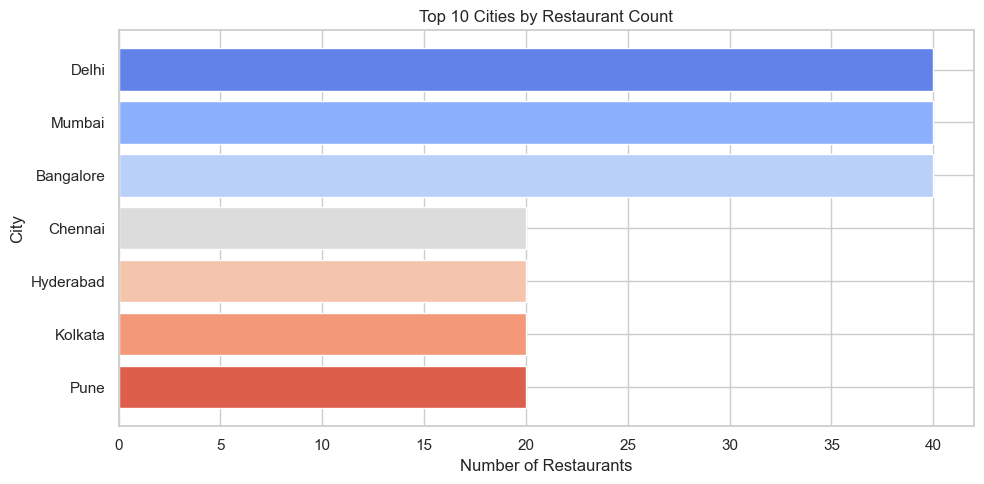

In [52]:
top_cities = df['City'].value_counts().head(10)

# 🎨 Custom colors using Seaborn palette
colors = sns.color_palette("coolwarm", len(top_cities))

# 📊 Horizontal bar chart using Matplotlib (no warnings!)
plt.figure(figsize=(10, 5))
plt.barh(top_cities.index, top_cities.values, color=colors)
plt.title('Top 10 Cities by Restaurant Count')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.gca().invert_yaxis()  # Highest value at the top
plt.tight_layout()
plt.show()


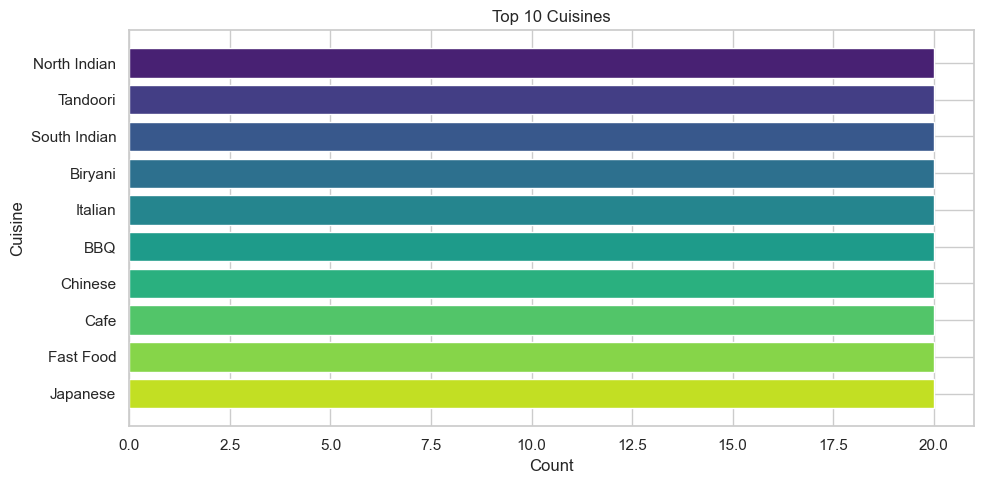

In [55]:
from collections import Counter

# 🔍 Process cuisine data
cuisines = df['Cuisines'].dropna().apply(lambda x: x.split(', ')[0])
top_cuisines = Counter(cuisines).most_common(10)
labels, values = zip(*top_cuisines)

# 🎨 Custom color palette
colors = sns.color_palette("viridis", len(values))

# 📊 Matplotlib bar chart — no warning
plt.figure(figsize=(10, 5))
plt.barh(labels, values, color=colors)
plt.title('Top 10 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<span style="font-size:30px"><b>Scatter Plot</b></span>


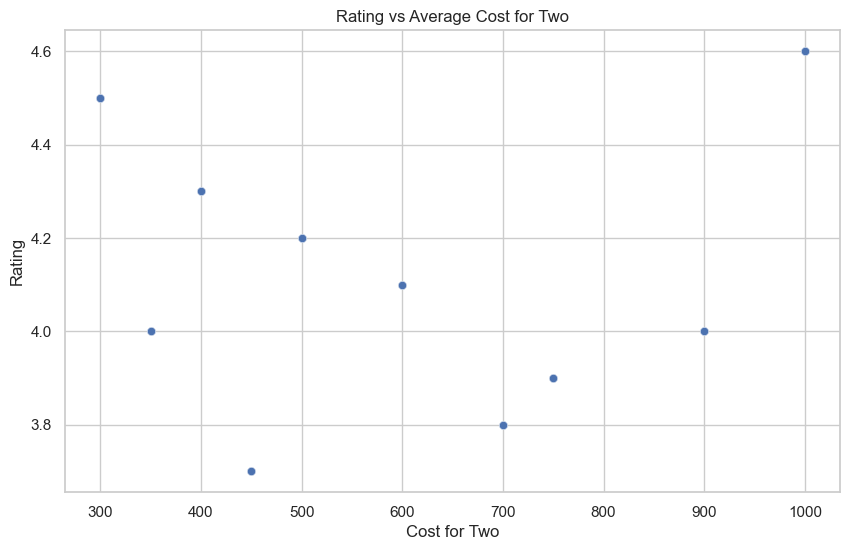

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Average Cost for two', y='Aggregate rating', alpha=0.5)
plt.title('Rating vs Average Cost for Two')
plt.xlabel('Cost for Two')
plt.ylabel('Rating')
plt.show()

<span style="font-size:30px"><b>Bar Plot</b></span>


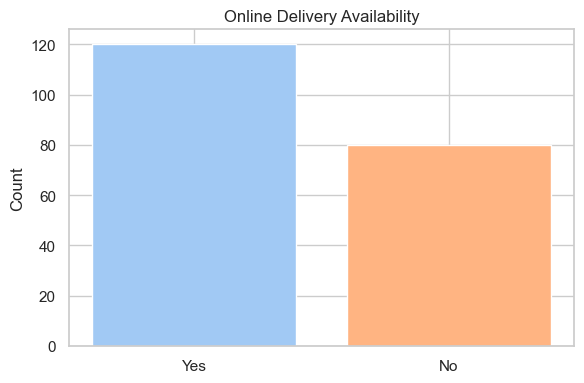

In [65]:
online_delivery = df['Has Online delivery'].value_counts()

# 🎨 Set custom colors
colors = sns.color_palette("pastel", len(online_delivery))

# 📊 Plot with Matplotlib
plt.figure(figsize=(6, 4))
plt.bar(online_delivery.index, online_delivery.values, color=colors)
plt.title('Online Delivery Availability')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
